## Customer Churn

Customer Churn is one of the important metrics to evaluate the growth potential of a business enterprise. It is measured as the percentage of customers that stopped using a company's product or services at the end of a time period by the number of customers it had at the beginning of the time period.
Customer churn analysis is used widely by telecommunication services, internet service providers, online streaming services, insuarance firms, etc. as the cost of retaining an existing customer is cheaper than acquiring a new one. Now, churn can be volunatry or  involuntary. Involutary churn can be the decision of a customer to switch to an alternative company or service providers. Involuntary churn includes relocation to other location, death, etc. In majority of the application, analysis is based on involuntary churn which can be primarily due to the customer's current product or service experience of a company or due to a better alternative options provided by a company's business competitors.
In this study, we use the data from a telecommunication company to perform churn analysis. Such an analysis will help in understanding the customer retention policies that are required to reduce the churn rate. The structure of this study are as follows:
- **I**: Exploratory data analysis

- **II**: Data pre-processing

- **III**: Predictive modeling

- **IV**: Conclusion

In [1]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans

> ## I. Exploratory data analysis:

In [2]:
TelecomChurn = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
TelecomChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# data summary
print("Data dimension:",TelecomChurn.shape)
TelecomChurn.info()

Data dimension: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes

The customer churn data mainly consists of customer's social characteristics, type of service packages used by them and the method of payment. There are 7043 observations with 21 variables.

In [4]:
# encoding the churn variable into 0 and 1
TelecomChurn['Churn'] = TelecomChurn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
TelecomChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


The variable 'Total Charges' is converted into a numeric format. Then check for any missing observations. Some observations for this variable is found to be missing. I'll be deleting the missing observations from the dataset.

In [5]:
# changing TotalCharges column from object to float
TelecomChurn['TotalCharges'] = TelecomChurn['TotalCharges'].apply(pd.to_numeric, downcast='float', errors='coerce')
print(TelecomChurn.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [6]:
# check for null and total observations related to it
null_columns=TelecomChurn.columns[TelecomChurn.isnull().any()]
TelecomChurn[null_columns].isnull().sum()

TotalCharges    11
dtype: int64

There were 11 missing observations under the variable 'Total Charges' which will be removed from the dataset.

In [7]:
# drop na variables
TelecomChurn = TelecomChurn.dropna()
TelecomChurn.shape

(7032, 21)

In [8]:
# summary description of the numeric variables of the dataset
TelecomChurn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771363
min,1.000000,18.250000,18.799999
25%,9.000000,35.587500,401.449997
50%,29.000000,70.350000,1397.475037
75%,55.000000,89.862500,3794.737488
max,72.000000,118.750000,8684.799805


There is no presence of negative or missing observations in these three variables. Next, I check the dimension of the categorical variables by looking at their unique values. The unique values vary between 2 and 4 for the categorical variables.

In [9]:
# to check the number of unique values in each of the columns
for col in list(TelecomChurn.columns):
    print(col, TelecomChurn[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


In [10]:
# calculate the proportion of churn vs non-churn
TelecomChurn['Churn'].mean()

0.26578498293515357

The churn rate is around 27% in this dataset. Now, I'll be looking at few variables which can give us more information about the factors that can effect customer churn.

In [11]:
# calculate the proportion of churn by gender
churn_by_gender = TelecomChurn.groupby(by='gender')['Churn'].sum() / TelecomChurn.groupby(by='gender')['Churn'].count() * 100.0
print('Churn by gender:',churn_by_gender)

Churn by gender: gender
Female    26.959518
Male      26.204565
Name: Churn, dtype: float64


There is no such significant difference in churn rate by gender.

In [12]:
# calculate the proportion of churn by contract
churn_by_contract = TelecomChurn.groupby(by='Contract')['Churn'].sum() / TelecomChurn.groupby(by='Contract')['Churn'].count() * 100.0
print('Churn by contract:',churn_by_contract)

Churn by contract: Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn, dtype: float64


Churn rate is highest for the short-term contract compared to the long-term contract. For a month-to-month contract, the churn rate is 42% which is higher compared to the 'one-year' or the 'two-year' contract. The churn rates for the 'one-year' or the 'two-year' contract are 11% and 2% respectively.

In [13]:
# calculate the proportion of churn by payment method
churn_by_payment = TelecomChurn.groupby(by='PaymentMethod')['Churn'].sum() / TelecomChurn.groupby(by='PaymentMethod')['Churn'].count() * 100.0
print('Churn by payment method:',churn_by_payment)
pd.DataFrame(churn_by_payment)

Churn by payment method: PaymentMethod
Bank transfer (automatic)    16.731518
Credit card (automatic)      15.253123
Electronic check             45.285412
Mailed check                 19.201995
Name: Churn, dtype: float64


,Churn
PaymentMethod,
Bank transfer (automatic),16.731518
Credit card (automatic),15.253123
Electronic check,45.285412
Mailed check,19.201995


The churn rate is the highest when the method of payment is through an electronic check. The other segments of the payment methods have a churn rate between 15% - 20%. The graph for this analysis is presented below.

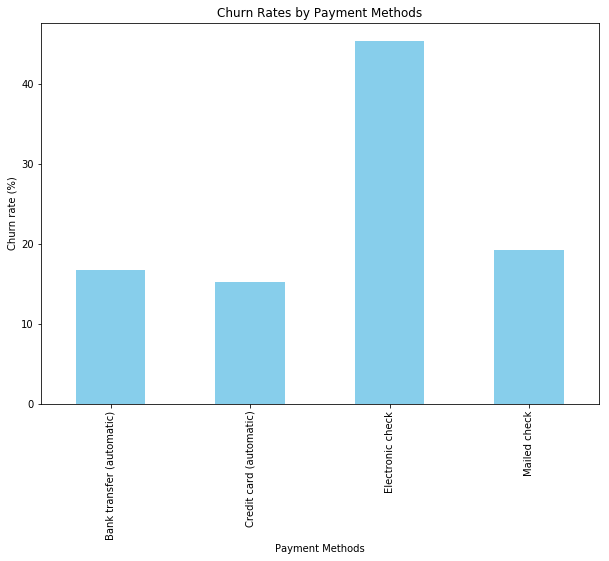

In [14]:
# figure
ax = churn_by_payment.plot(
    kind='bar',
    color='skyblue',
    grid=False,
    figsize=(10, 7),
    title='Churn Rates by Payment Methods'
)

ax.set_xlabel('Payment Methods')
ax.set_ylabel('Churn rate (%)')

plt.show()

In [15]:
# proportion of churn by gender and contract
churn_gendercontract = TelecomChurn.groupby(['gender', 'Contract'])['Churn'].sum()/TelecomChurn.groupby(['gender', 'Contract'])['Churn'].count()*100
churn_gendercontract

gender  Contract      
Female  Month-to-month    43.740260
        One year          10.445682
        Two year           2.619048
Male    Month-to-month    41.692308
        One year          12.068966
        Two year           3.076923
Name: Churn, dtype: float64

In [16]:
# keep gender in row and contract by column
churn_gendercontract1 = churn_gendercontract.unstack('Contract').fillna(0)
churn_gendercontract1 

Contract,Month-to-month,One year,Two year
gender,,,
Female,43.740260,10.445682,2.619048
Male,41.692308,12.068966,3.076923


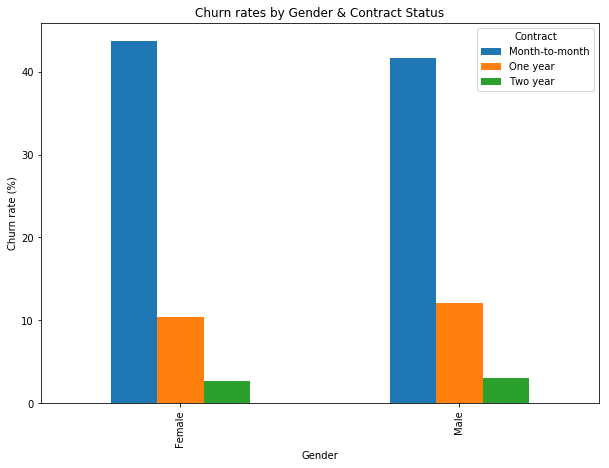

In [17]:
# figure
ax = churn_gendercontract1.plot(
    kind='bar', 
    grid= False,
    figsize=(10,7)
)

ax.set_title('Churn rates by Gender & Contract Status')
ax.set_xlabel('Gender')
ax.set_ylabel('Churn rate (%)')

plt.show()

The above figure analyzed the churn rate when it is grouped by gender and contract type. Irrespective of the gender, we find that the churn rate is the highest for the month-to-month contract type. The conclusion of this analysis is similar to the conclusion derived from their individual analysis presented above.

In [18]:
# observations by citizen type
TelecomChurn['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [19]:
# Total observations by citizen type, contract and tech support 
TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].count()

SeniorCitizen  Contract        TechSupport        
0              Month-to-month  No                     1982
                               No internet service     512
                               Yes                     574
               One year        No                      458
                               No internet service     347
                               Yes                     477
               Two year        No                      202
                               No internet service     609
                               Yes                     729
1              Month-to-month  No                      698
                               No internet service      12
                               Yes                      97
               One year        No                       99
                               No internet service      16
                               Yes                      75
               Two year        No                       33
     

In [20]:
# proportion of churn by gender and contract
churn_citizentechcontract = TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].sum()/TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].count()*100
churn_citizentechcontract

SeniorCitizen  Contract        TechSupport        
0              Month-to-month  No                     47.780020
                               No internet service    18.359375
                               Yes                    30.139373
               One year        No                     14.628821
                               No internet service     2.593660
                               Yes                    12.788260
               Two year        No                      5.940594
                               No internet service     0.821018
                               Yes                     3.429355
1              Month-to-month  No                     57.736390
                               No internet service    41.666667
                               Yes                    34.020619
               One year        No                     15.151515
                               No internet service     0.000000
                               Yes                   

In [21]:
# keep gender and payment method in row and contract by column
churn_citizentechcontract1 = churn_citizentechcontract.unstack(['TechSupport']).fillna(0)
churn_citizentechcontract1

TechSupport                          No  No internet service        Yes
SeniorCitizen Contract                                                 
0             Month-to-month  47.780020            18.359375  30.139373
              One year        14.628821             2.593660  12.788260
              Two year         5.940594             0.821018   3.429355
1             Month-to-month  57.736390            41.666667  34.020619
              One year        15.151515             0.000000  18.666667
              Two year         6.060606             0.000000   4.545455

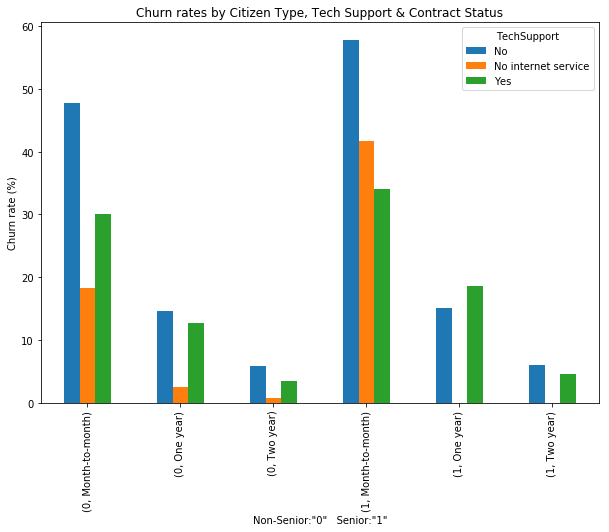

In [22]:
# figure
ax = churn_citizentechcontract1.plot(
    kind='bar', 
    grid= False,
    figsize=(10,7)
)

ax.set_title('Churn rates by Citizen Type, Tech Support & Contract Status')
ax.set_xlabel('Non-Senior:"0"   Senior:"1"')
ax.set_ylabel('Churn rate (%)')

plt.xticks()
plt.show()

Few interesting conclusions can be derived from the above exploratory data analysis. The above analysis is based on the citizen type, contract type and technical support. The senior citizen is denoted as 1 or 0 otherwise. Non-senior citizens are the majority in this dataset by around 5:1 ratio. For the senior citizen, there is no churn rate for the no internet service for the one-year and two-year contracts.

The availability of tech support helps in reducing the churn rate compared to those with no tech support. Though churn rate is even lower for those with no internet service compared to those with technical support. It is not clear if they have any other means of customer service available to them without an internet service or not. Nevertheless, improvement in the technical support can be useful in reducing the churn rate.

In [23]:
# summary of tenure, monthly charges and total charges
TelecomChurn[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771363
min,1.000000,18.250000,18.799999
25%,9.000000,35.587500,401.449997
50%,29.000000,70.350000,1397.475037
75%,55.000000,89.862500,3794.737488
max,72.000000,118.750000,8684.799805


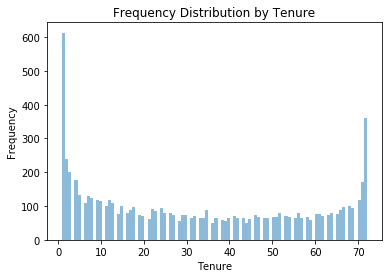

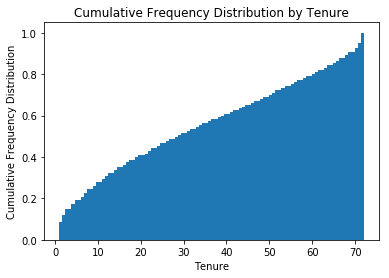

In [24]:
# plot a histogram
plt.hist(TelecomChurn['tenure'], bins= 100, alpha=0.5,)
plt.title('Frequency Distribution by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()


plt.hist(TelecomChurn['tenure'], cumulative=1, density =True, bins= 100)
plt.title('Cumulative Frequency Distribution by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Cumulative Frequency Distribution')
plt.show()

From the above analysis, I found that a significant share of the customers are either new with a tenure of less than 10 months or old customers with more than 70 months of tenure. From the cumulative frequency distribution plot, we find that around 20% of the customers have a tenure of less than 10 months. Around 70% of the customers have a tenure between 10 months and 60 months. And the remaining 20% have a tenure more than 60 months.

From the graph presented below, the churn rate decreases as the tenure length increases. This indicates customer loyalty in terms of tenure length and its effect on the churn rate. I can conclude that the telecom service producer should focus on the new customers so that they avail its telecom services for a longer period of time.

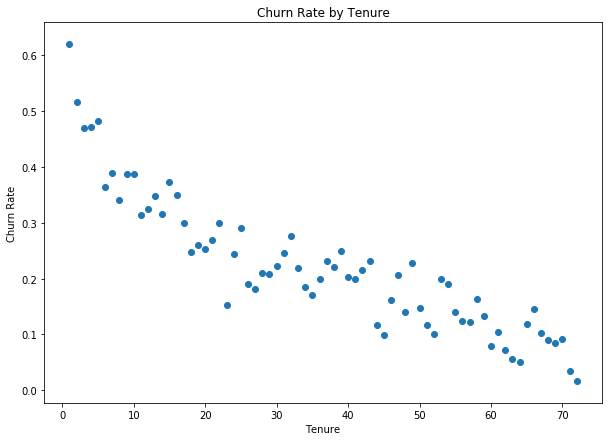

In [25]:
# proportion of churn by tenure
churn_monthlycharges = TelecomChurn.groupby(by = 'tenure')['Churn'].mean().reset_index()
churn_monthlycharges

plt.figure(figsize=(10,7))
plt.scatter(churn_monthlycharges.tenure, churn_monthlycharges.Churn)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.show()

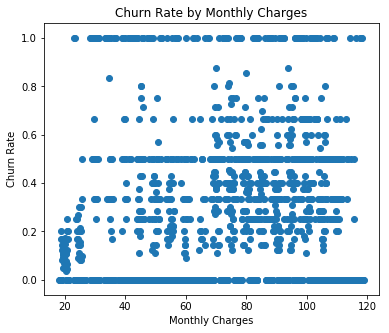

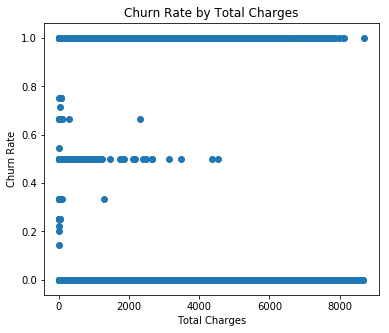

In [26]:
# proportion of churn by MonthlyCharges
churn_monthlycharges = TelecomChurn.groupby(by = 'MonthlyCharges')['Churn'].mean().reset_index()
plt.figure(figsize=(6,5))
plt.scatter(churn_monthlycharges.MonthlyCharges, churn_monthlycharges.Churn)
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.show()

# proportion of churn by TotalCharges
churn_totalcharges = TelecomChurn.groupby(by = 'TotalCharges')['Churn'].mean().reset_index()
plt.figure(figsize=(6,5))
plt.scatter(churn_totalcharges.TotalCharges, churn_totalcharges.Churn)
plt.title('Churn Rate by Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Churn Rate')
plt.show()

The pattern for churn rate for monthly charges varies quite a lot between 0 and 1. Whereas, the churn rate is mostly either 0 or 1 for the total charges. It is hard to graphically derive additional insights about churn vs no-churn from these two variables.

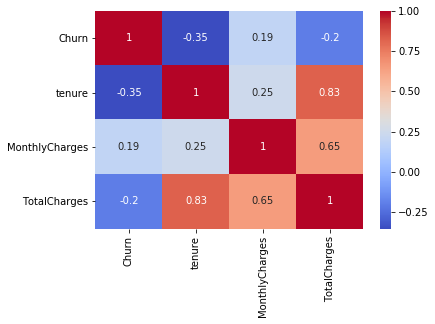

In [27]:
# finding correlations
corrdata = TelecomChurn[['Churn','tenure','MonthlyCharges','TotalCharges']]
corr = corrdata.corr()
# plot the heatmap
sns.heatmap(corr,cmap="coolwarm",
        xticklabels=corrdata.columns,
        yticklabels=corrdata.columns,annot=True)

From the above, correlation plot I find some interesting conclusions. Total Charges are highly correlated with tenure and monthly charges. Whereas, correlation between tenure and monthly charges is low.

There is a negative relationship between churn and tenure. There is a positive relationship between churn and tenure. Both these relationships make sense. But, I see a negative relationship between total charges and churn. This means that as the total charges increases, the churn rate goes down. This conclusion is absurd! Why a customer will be willing to pay a higher cost for the services? I'll be droping 'Total Charges' from the final dataset due to high collinearity with tenure and monthly charges, as well as a negative relationship with churn.

> ## II. Data pre-processing:

In this section, I'm going to process the data which will be used for predictive modeling. I'll scale the 'tenure' and 'Monthly Charges', and pre-process the categorical variables.

In [28]:
# segmenting based on data type and pre-processing
#customer id col
Id_col     = ['customerID']
#Target column. y should be an array
target_col = ["Churn"]
y = (TelecomChurn[target_col]).values.ravel()
# cluster column 
cluster_col = ["tenure"]
#categorical columns with categories less than 6
cat_cols   = TelecomChurn.nunique()[TelecomChurn.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
print(cat_cols)
#Binary columns with 2 values
bin_cols   = TelecomChurn.nunique()[TelecomChurn.nunique() == 2].keys().tolist()
print(bin_cols)
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(multi_cols)
# continuous column
cont_col = ["tenure","MonthlyCharges"]
print(cont_col)
print(y)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
['tenure', 'MonthlyCharges']
[0 0 1 ... 0 1 0]


In [29]:
#Label encoding Binary columns
le = LabelEncoder()
binary = TelecomChurn[bin_cols]
print(binary.shape) 
print(binary.info())
binary.head()
for i in bin_cols :
    binary[i] = le.fit_transform(binary[i])

(7032, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 7 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
PaperlessBilling    7032 non-null object
Churn               7032 non-null int64
dtypes: int64(2), object(5)
memory usage: 439.5+ KB
None


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# multi-label categorical columns
dummy_vars = pd.get_dummies(TelecomChurn[multi_cols])
print(dummy_vars.shape)
print(dummy_vars.info())

(7032, 31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
MultipleLines_No                           7032 non-null uint8
MultipleLines_No phone service             7032 non-null uint8
MultipleLines_Yes                          7032 non-null uint8
InternetService_DSL                        7032 non-null uint8
InternetService_Fiber optic                7032 non-null uint8
InternetService_No                         7032 non-null uint8
OnlineSecurity_No                          7032 non-null uint8
OnlineSecurity_No internet service         7032 non-null uint8
OnlineSecurity_Yes                         7032 non-null uint8
OnlineBackup_No                            7032 non-null uint8
OnlineBackup_No internet service           7032 non-null uint8
OnlineBackup_Yes                           7032 non-null uint8
DeviceProtection_No                        7032 non-null uint8
DeviceProtection_No internet service       7032 non-null uint8


In [31]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(TelecomChurn[cont_col])
scaled = pd.DataFrame(TelecomChurn,columns= cont_col)
scaled.shape
print(scaled.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 2 columns):
tenure            7032 non-null int64
MonthlyCharges    7032 non-null float64
dtypes: float64(1), int64(1)
memory usage: 164.8 KB
None


In [32]:
# creating a dataset to combine pre-processed variables
X = pd.concat([binary,scaled,dummy_vars], axis = 1)
# drop churn variable from the X dataset
X = X.drop(['Churn'],axis=1)
print(X.shape)
print(X.info())

(7032, 39)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 39 columns):
gender                                     7032 non-null int64
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
PhoneService                               7032 non-null int64
PaperlessBilling                           7032 non-null int64
tenure                                     7032 non-null int64
MonthlyCharges                             7032 non-null float64
MultipleLines_No                           7032 non-null uint8
MultipleLines_No phone service             7032 non-null uint8
MultipleLines_Yes                          7032 non-null uint8
InternetService_DSL                        7032 non-null uint8
InternetService_Fiber optic                7032 non-null uint8
InternetService_No                         7032 non-null uint

> ## III. Predictive Modeling    

The objective of this study is to predict the churn vs no-Churn situation from the telecom dataset.Inorder to predict the outcome, we need to predict whether a customer will churn or not i.e.(Churn/NoChurn as (1/0)).

Now for each of the observations, four different events can occur when we try to predict:
- case 1: predicted as 1 which are actually 1. Also known as True Positives (TP).
- case 2: predicted as 1 which are actually 0. Also known as False Positives (FP).Also known as Type I error.
- case 3: predicted as 0 which are actually 0. Also known as True Negatives (TN).
- case 4: predicted as 0 which are actually 1. Also known as False Negatives (FN).Also known as Type II error.

In this study, predicting churn accurately is very important as it has a far-reaching impact on the future prospect of the business. This means a prediction analysis will be able to identify case 1 with greater accuracy. This means the objective of the study is to minimize case 4 or Type II error. There are certain criterias based on which prediction models will be judged. Let's look at those criteria.

Accuracy,precision, recall, F1 and specificity are the different types of precision metrics used in evaluating the performance of the prediction models. These are also used to compare the performances between different alternative models. Accuracy measures the ratio of TP and TN given all the observations. Precision measures the ratio of the relevant class (i.e.Churn(1)) correctly predicted given the total number of predictions made for the relevant class. Recall also known as sensitivity measures the ratio of the relevant class given the actual number of observations of the relevant class. F1 score is the weighted average of precision and recall. It is particularly useful when we want to strike a balance between precision and recall. Sensitivity is the ratio of TN given the actual number of observations that belongs to the negative class. Another important metrics are Receiver Operating Curve (ROC) and Area under the Curve (AUC). A good discussion on these metrics are available at: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5.

As mentioned earlier, one of the important objectives of the prediction model here is to reduce False Negatives (FN). This means that we have to consider improving the recall. But reducing the FN sometimes leads to an increase in FP which means precision may decrease. In this case, I'll look at the F1 scores along with the AUC values to decide on the best model for this study.

In [33]:
# import machine learning libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb

# creating the function
# XGBoost and SVC functions are used while modeling and are thus not presented here
logreg = LogisticRegression(solver='lbfgs', max_iter = 10000)
DT = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

Recursive Feature Elimination (RFE) is a method of selecting a subset of independent variables (features) that are relevant for predicting the target variable i.e. churn in this study. It uses the model accuracy to identify the attributes that contribute the most towards explaining the target variable. One can use logistic regression and tree-based models for feature extraction. I'm using random forest for feature extraction here. More information on RFE is provided in https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [34]:
# recursive feature extraction for the top 15 features
rfe = RFE(rfc, 10)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

#identifying columns for RFE
rfe_data = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })

# extract columns as a list
rfe_var = rfe_data[rfe_data["rfe_support"] == True]["columns"].tolist()

rfe_data

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[ True False  True False False  True  True  True False False False False
 False False  True False False  True False False False False False  True
 False False False False False False False False  True False False False
 False  True False]
[ 1  5  1  6 22  1  1  1  4 24 11 17  2 29  1 19 20  1 26 21  3 25 14  1
 28 18 13 30  8  7 27 16  1 15 23 10  9  1 12]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,rfe_support,columns,ranking
0,True,gender,1
1,False,SeniorCitizen,5
2,True,Partner,1
3,False,Dependents,6
4,False,PhoneService,22
5,True,PaperlessBilling,1
6,True,tenure,1
7,True,MonthlyCharges,1
8,False,MultipleLines_No,4
9,False,MultipleLines_No phone service,24


In [35]:
# select a subset of variables for the dataframe based on RFE method
X1 = X[rfe_var]

#### Logistic Regression

In [36]:
# running a logistic regression
# copy the dataset 
X2 = X1
# manually add intercept
X2['intercept'] = 1.0;
#X2.head()
logit_model=sm.Logit(y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.423762
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.268    
Dependent Variable:      y                     AIC:                   5981.7918
Date:                    2019-10-17 05:28      BIC:                   6057.2322
No. Observations:        7032                  Log-Likelihood:        -2979.9  
Df Model:                10                    LL-Null:               -4071.7  
Df Residuals:            7021                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


I ran a logistic regression model to understand the effect of the independent variables on the target variable. Given the p-values, most of the variables are insignificant at 5% level of significance. Let's interpret the above result for some selected variables. For gender, male is denoted as 1 and female is denoted 0. The negative coefficient estimate before the 'gender' variable suggest that the log-odd of churn for male relative to female is lower. This is consistent with the data analysis done with gender earlier.

If the tenure length increases then the log-odds of churning i.e. the possibility of churn decreases. This statistical result confirms the result obtained earlier from the exploratory data analysis. In case of the tech support availability, if the tech support is not available then the possibility of churn increases. If there is a month-to-month contract then the chances of churn increases. An increase in monthly charges increases the churn rate. These statistical results are similar to the conclusions drawn from the exploratory data analysis.

In [37]:
# create a train and test set with the new selected variables
Xtrain, Xtest, ytrain,ytest = train_test_split(X1,y,test_size = 0.2,random_state = 111)

In [38]:
print('Ratio of churn in the training sample:',ytrain.mean())
print('Ratio of churn in the training sample:',ytest.mean())

Ratio of churn in the training sample: 0.2625777777777778
Ratio of churn in the training sample: 0.27860696517412936


In the preceding section, I have split the dataset into train and test set. I'll be using 10-fold cross validation which is an useful method for model training when you have an unbalanced dataset. The data here is unbalanced because the ratio of churn to non-churn is 1:3. I'll also use grid search to derive the optimal model. To know more about GridSearchCV and its importance check this link: https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models 

First objective of prediction modeling is to create a base model. In this case, a simple logistic regression is my base model. Then explore alternative machine learning models to find better models for improving the prediction capability. For comparison across different models, I'll look at precision, recall, f1-score and auc score.

#### Logistic Regression (Base)

In [39]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator=logreg, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.802
Best parameters: {'C': 0.01}


In [40]:
def result(X_test,y_test):

    y_test_pred = grid.predict(X_test)
    print('Accuracy score:{:.2f}'.format(accuracy_score(y_test, y_test_pred)))
    print(                                                                                )

    confusionmat_data = pd.DataFrame({'y_Predicted': y_test_pred,'y_Actual': y_test},columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(confusionmat_data['y_Actual'], confusionmat_data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print('Confusion Matrix:\n {}\n'.format(confusion_matrix))
    print(                                                                               )

    class_report = classification_report(y_test, y_test_pred)
    print('Classification report:\n {}\n'.format(class_report))
    print(                                                                               )

    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    print('Mean-squared error:\n {}\n'.format(rmse))

    # predict probabilities
    #probs = grid.predict_proba(X_test)
    #probs = grid.predict(X_test)

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


Accuracy score:0.79

Confusion Matrix:
 Predicted    0    1
Actual             
0          908  107
1          194  198


Classification report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1015
           1       0.65      0.51      0.57       392

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Mean-squared error:
 0.46252605143786923



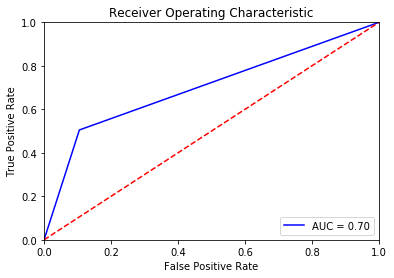

In [41]:
# result
result(Xtest,ytest)

#### Decision Tree Classification Model

In [42]:
parameters = {'min_samples_split': [10,100,1000,10000],
              'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= DT, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.786
Best parameters: {'max_depth': 10, 'min_samples_split': 100}


0.43000835490369277 Contract_Month-to-month
0.21687511958900174 MonthlyCharges
0.16990174174994851 tenure
0.12056468287681499 OnlineSecurity_No
0.019934126203153615 PaymentMethod_Electronic check


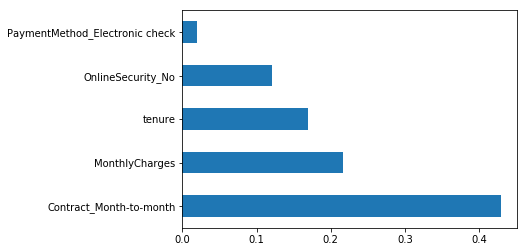

In [43]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,Xtrain.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh')  

Accuracy score:0.79

Confusion Matrix:
 Predicted    0    1
Actual             
0          921   94
1          205  187


Classification report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1015
           1       0.67      0.48      0.56       392

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Mean-squared error:
 0.46098685897829583



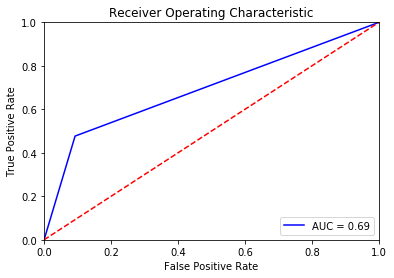

In [44]:
# result
result(Xtest,ytest)

#### Random Forest Classification Model

In [45]:
parameters = {'n_estimators': [1,5,10,100,200],'min_samples_split': [10,100,1000,10000],'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= rfc, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.805
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


0.26264740344655396 tenure
0.23770133484171038 MonthlyCharges
0.17306543854565046 Contract_Month-to-month
0.10262394176244498 OnlineSecurity_No
0.06590220384483422 TechSupport_No


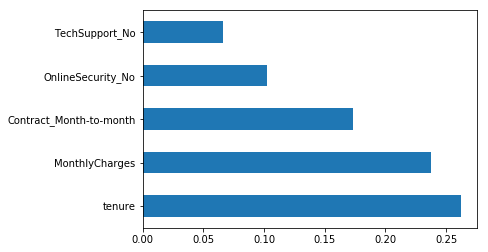

In [46]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,Xtrain.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh')   

Accuracy score:0.80

Confusion Matrix:
 Predicted    0    1
Actual             
0          916   99
1          189  203


Classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1015
           1       0.67      0.52      0.59       392

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Mean-squared error:
 0.4524277086524467



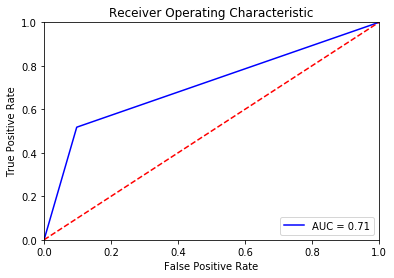

In [47]:
# result
result(Xtest,ytest)

#### XGBoost Classification Model

In [48]:
#building the model & printing the score
parameter = {
'max_depth': [1,5,10,15],
'n_estimators': [50,100,150,300],
'learning_rate': [0.01, 0.1, 0.3],
}

grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_grid = parameter, cv= 5, scoring='balanced_accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.708
Best parameters: {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 100}


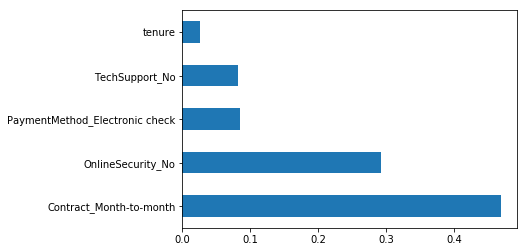

In [49]:
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh') 

Accuracy score:0.79

Confusion Matrix:
 Predicted    0    1
Actual             
0          905  110
1          190  202


Classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1015
           1       0.65      0.52      0.57       392

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Mean-squared error:
 0.4617570965396101



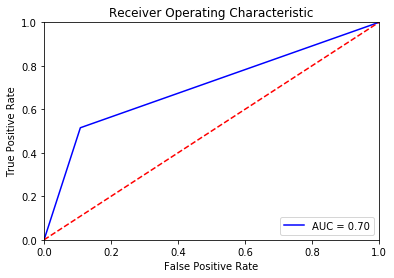

In [50]:
# result
result(Xtest,ytest)

#### SVC Classification Model

In [51]:
parameter = {'C': [5,10, 100]}
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid = parameter, cv= 4)

grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.797
Best parameters: {'C': 10}


Accuracy score:0.79

Confusion Matrix:
 Predicted    0    1
Actual             
0          893  122
1          174  218


Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1015
           1       0.64      0.56      0.60       392

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Mean-squared error:
 0.4586683856432971



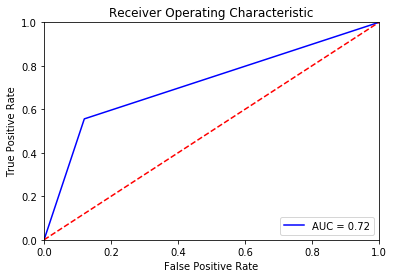

In [52]:
# result
result(Xtest,ytest)

We can summarize the result as follows:

**1.**: Variables such as contract type, status of online security, method of internet service provided, availability status of technical support and payment method are among the top 5 variables in the predictive analysis.

**2.**: Precision is greater than recall. The f1-score ranges between 0.55 and 0.62 for the 'churn' class.It is the highest for decision tree model.

**3.**: The AUC score ranges between 0.70 and 0.74. In terms of the AUC score, an optimal Decision Tree is the best model followed by SVM and XGBoost.

As I'm working with an unbalanced dataset, machine learning models can be bias in favor of the majority classi.e. no churn as opposed to the minority class i.e. churn. Given the objective of this study, understanding and predicting 'churn' becomes very important. But unbalanced dataset effect the prediction analysis for 'churn' with a lower recall value. In order to overcome this problem, I'm going to use SMOTE which is a type of an over-sampling method.

SMOTE balances the class distribution between 'churn' and 'no churn'. Under this method new observations for 'churn' are created between the existing 'no churn' observations. It generates the training sample by the linear transformation of the existing observations of the 'churn' class.

#### SMOTE (Synthetic Minority Oversampling Technique)

As I'm working with an unbalanced dataset, machine learning models can be biased in favor of the majority class i.e. no churn as opposed to the minority class i.e. churn. Given the objective of this study, predicting 'churn' becomes very important. But unbalanced dataset effect the prediction analysis for 'churn' with a lower recall value. In order to overcome this problem, I'm going to use SMOTE which is a type of an over-sampling method.

SMOTE balances the class distribution between 'churn' and 'no churn'. Under this method new observations for 'churn' are created between the existing 'no churn' observations. It generates the training sample by the linear transformation of the existing observations of the 'churn' class.

In [53]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [54]:
#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(X,y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns= X.columns)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns= ['Churn'])

print(os_smote_X.shape)
print(os_smote_Y.shape)

(7790, 39)
(7790, 1)


In [55]:
rfe = RFE(rfc, 10)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

#identified columns Recursive Feature Elimination
rfe_data = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
selected_cols = rfe_data[rfe_data["rfe_support"] == True]["columns"].tolist()

rfe_data
print(selected_cols)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[ True False False False False  True  True  True False False False False
  True False  True False False  True False False False False False  True
 False False False False False False False False  True False False False
 False  True False]
[ 1  5  3  7 24  1  1  1  2 22 12 18  1 29  1 27 19  1 28 15  6 26 13  1
 25 21  8 30 14  4 23 17  1 20  9 16 10  1 11]
['gender', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']


In [56]:
# calculate the proportion of churn is now equal to the no churn
os_smote_Y.mean()

Churn    0.5
dtype: float64

In [57]:
#train and test data under SMOTE
train_smoterfe_X = os_smote_X[selected_cols]
train_smoterfe_Y = os_smote_Y.values.ravel()
test_smoterfe_X  = smote_test_X[selected_cols]
test_smoterfe_Y  = smote_test_Y

#### Logistic Regression with SMOTE

In [58]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator=logreg, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)


Best score: 0.766
Best parameters: {'C': 0.1}


Accuracy score:0.76

Confusion Matrix:
 Predicted    0    1
Actual             
0          959  309
1          108  382


Classification report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1268
           1       0.55      0.78      0.65       490

    accuracy                           0.76      1758
   macro avg       0.73      0.77      0.73      1758
weighted avg       0.80      0.76      0.77      1758



Mean-squared error:
 0.4870332280119225



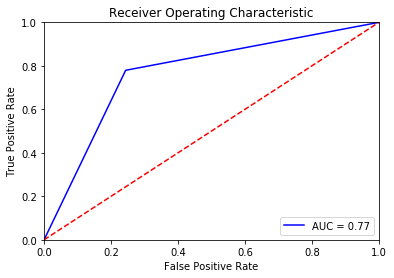

In [59]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

#### Decision Tree with Smote    

Best score: 0.823
Best parameters: {'max_depth': 10, 'min_samples_split': 10}
0.4652619821122969 Contract_Month-to-month
0.12557558760355716 OnlineSecurity_No
0.10324093415352592 tenure
0.09780315700242434 MonthlyCharges
0.0962455588667927 PaymentMethod_Electronic check


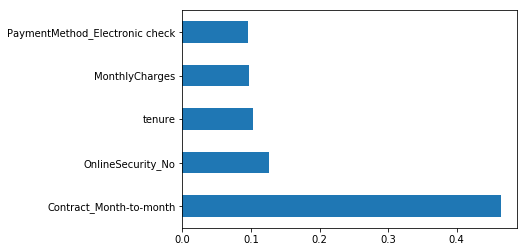

In [60]:
parameters = {'min_samples_split': [10,100,1000,10000],
              'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= DT, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_) 

grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,train_smoterfe_X.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = train_smoterfe_X.columns)
featureimp_plot.nlargest(5).plot(kind='barh')   

Accuracy score:0.78

Confusion Matrix:
 Predicted     0    1
Actual              
0          1087  181
1           198  292


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1268
           1       0.62      0.60      0.61       490

    accuracy                           0.78      1758
   macro avg       0.73      0.73      0.73      1758
weighted avg       0.78      0.78      0.78      1758



Mean-squared error:
 0.46431227967855404



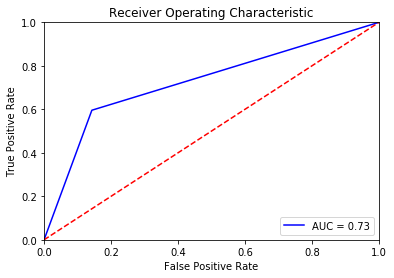

In [61]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

#### Random Forest with SMOTE

In [62]:
parameters = {'n_estimators': [1,5,10,100,200],'min_samples_split': [10,100,1000,10000],'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= rfc, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.856
Best parameters: {'max_depth': 200, 'min_samples_split': 10, 'n_estimators': 100}


0.1914057997637062 Contract_Month-to-month
0.17007104883822904 tenure
0.15336418535561006 MonthlyCharges
0.13225183233523172 OnlineSecurity_No
0.10515174628824461 PaymentMethod_Electronic check


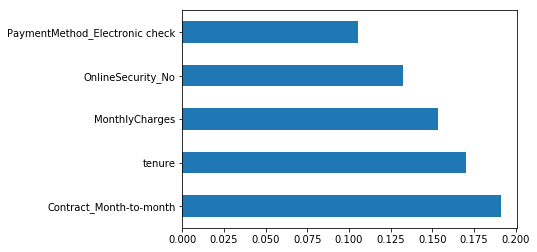

In [63]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,train_smoterfe_X.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = train_smoterfe_X.columns)
featureimp_plot.nlargest(5).plot(kind='barh')   

Accuracy score:0.79

Confusion Matrix:
 Predicted     0    1
Actual              
0          1118  150
1           212  278


Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1268
           1       0.65      0.57      0.61       490

    accuracy                           0.79      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.79      0.79      1758



Mean-squared error:
 0.45377947664514956



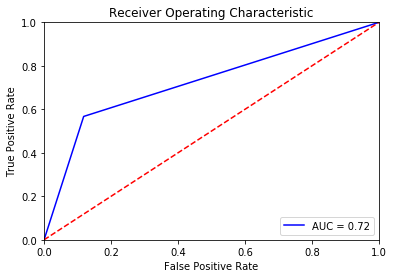

In [64]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

#### XGBoost with SMOTE

In [65]:
#building the model & printing the score
parameter = {
'max_depth': [1,5,10,15],
'n_estimators': [50,100,150,300],
'learning_rate': [0.01, 0.1, 0.3],
}

grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_grid = parameter, cv= 5, scoring='balanced_accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.844
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


0.45358217 Contract_Month-to-month
0.099623166 OnlineSecurity_No
0.091547824 InternetService_Fiber optic
0.0864135 TechSupport_No
0.071335904 PaymentMethod_Electronic check


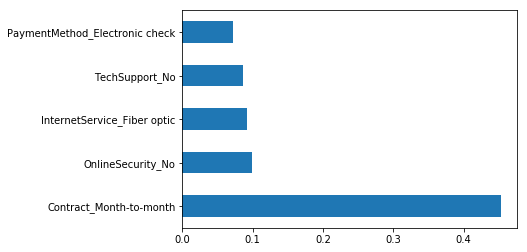

In [66]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,train_smoterfe_X.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = train_smoterfe_X.columns)
featureimp_plot.nlargest(5).plot(kind='barh')  

Accuracy score:0.80

Confusion Matrix:
 Predicted     0    1
Actual              
0          1102  166
1           178  312


Classification report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1268
           1       0.65      0.64      0.64       490

    accuracy                           0.80      1758
   macro avg       0.76      0.75      0.75      1758
weighted avg       0.80      0.80      0.80      1758



Mean-squared error:
 0.44235382396280526



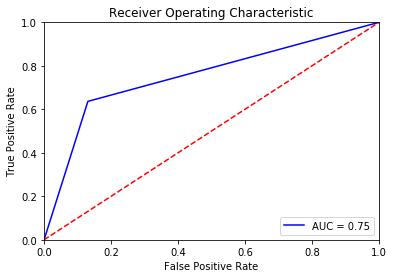

In [67]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

#### SVM with SMOTE

In [68]:
parameter = {'C': [1,5,10, 100]}
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid = parameter, cv= 4)
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.764
Best parameters: {'C': 100}


Accuracy score:0.77

Confusion Matrix:
 Predicted    0    1
Actual             
0          969  299
1          112  378


Classification report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1268
           1       0.56      0.77      0.65       490

    accuracy                           0.77      1758
   macro avg       0.73      0.77      0.74      1758
weighted avg       0.80      0.77      0.78      1758



Mean-squared error:
 0.4835166966139193



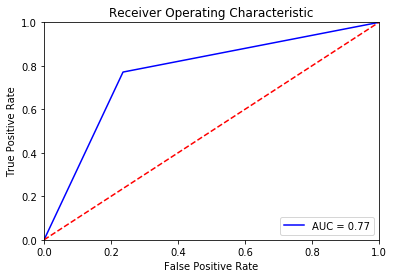

In [69]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

> ## IV. Conclusion:

**1.**: SMOTE has reduced the gap between precision and recall for the 'churn' class. Precision still remains higher than recall for the 'churn class' except for the Logistic Regression and linear SVM models. For these two models, recall becomes higher than precision. The recall value improved in majority of the models due to a lower False Negatives. The f1-score is between 0.60 and 0.65 for the 'churn' class. 

**2.**: The AUC score is now between 0.72 and 0.77. The AUC score decresed for the Decision Tree. Logistic Regression and linear SVM model has the highest AUC score of 0.77. In terms of AUC score, both these models are best suited for this study. I will prefer Logistic Regression because it is simple, intuitive and interpretable.